In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import (Dense,Conv2D,Flatten,BatchNormalization,
                                     Activation,Input,MaxPooling2D)
import numpy as np

In [15]:
def plot_imgs(img,labs):
  fig,axs = plt.subplots(4,2,figsize=(10,10))
  x = 0
  for i in range(4):
    for j in range(2):
      axs[i,j].imshow(img[x])
      axs[i,j].scatter(labs[x][::2],labs[x][1::2])
      x+=1

CelebA dataset is dataset with more than 0.2 millions images with X,Y co-ordinates of facial landmarks Nose,Two eyes and 2 Poins on mouth.

Here I am using Tfrecord file which i created using create_tfrecord.ipynb

In [6]:
def parse(example_point):
  feature_key = {
      'image' : tf.io.FixedLenFeature([],tf.string),
      'landscapes' : tf.io.FixedLenFeature([10],tf.float32),
      'bboxs' : tf.io.FixedLenFeature([4],tf.float32),
      'attributes' : tf.io.FixedLenFeature([40],tf.float32)
  }

  example = tf.io.parse_single_example(example_point,feature_key)
  img = tf.io.decode_image(example['image'],channels=3)
  img = tf.reshape(img,(218,178,3))
  img = tf.cast(img,dtype=tf.float32)/255.0
  h,w =  (218,178)    #img.shape[:-1]
  landscaps = example['landscapes']
  return img,landscaps

In [7]:
tfrecord_file = '/content/drive/MyDrive/New folder/test_celebA2.tfrecord'
dataset = tf.data.TFRecordDataset(tfrecord_file)
dataset = dataset.map(parse)
batch_size = 8
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
train_dataset = iter(dataset)

In [8]:
def create_model():
  model = tf.keras.Sequential([
      Conv2D(16,kernel_size=3,padding='same',input_shape=(218,178,3)),
      Activation('relu'),
      Conv2D(16,kernel_size=3,padding='same'),
      Activation('relu'),
      Conv2D(16,kernel_size=3,padding='same'),
      Activation('relu'),
      MaxPooling2D(),

      Conv2D(32,kernel_size=3,padding='same'),
      Activation('relu'),
      Conv2D(32,kernel_size=3,padding='same'),
      Activation('relu'),
      Conv2D(32,kernel_size=3,padding='same'),
      Activation('relu'),
      MaxPooling2D(),

      Flatten(),
      Dense(10)

  ])

  return model

In [9]:
model = create_model()
#model.summary()
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam())

In [11]:
model.fit(dataset,epochs=1)

7598/7598 [==============================] - 160s 21ms/step - loss: 2.1965


In [12]:
img,labs = next(train_dataset)
pred_labs = model.predict(img)

1/1 [==============================] - 0s 124ms/step


In [13]:
pred_labs

array([[ 70.444534, 110.60645 , 106.154434, 110.272   ,  77.88613 ,
        134.6844  ,  73.61293 , 153.38841 , 102.35069 , 152.38214 ],
       [ 71.12482 , 109.290306, 104.78588 , 110.98121 ,  76.88489 ,
        137.38516 ,  72.35637 , 153.38287 , 105.0971  , 154.50291 ],
       [ 68.4603  , 110.68406 , 107.73079 , 111.93233 ,  84.323906,
        136.34196 ,  71.01169 , 151.55373 , 106.28149 , 151.53218 ],
       [ 69.966286, 111.37507 , 107.18201 , 110.39287 ,  88.27854 ,
        136.14229 ,  72.99863 , 153.80342 , 102.51701 , 151.06512 ],
       [ 71.580086, 109.50575 , 104.629845, 110.363045,  84.72918 ,
        136.90775 ,  74.78421 , 154.19765 , 102.221306, 154.47588 ],
       [ 69.363205, 110.62878 , 106.9736  , 111.57327 ,  88.79517 ,
        134.16763 ,  71.85897 , 152.52188 , 105.6091  , 152.39648 ],
       [ 69.15814 , 110.27315 , 106.63026 , 111.605995,  80.04907 ,
        136.32968 ,  74.47152 , 151.26984 , 102.75511 , 153.06305 ],
       [ 69.73083 , 111.61185 , 107.36125

Ground Truth Facial Landmarks

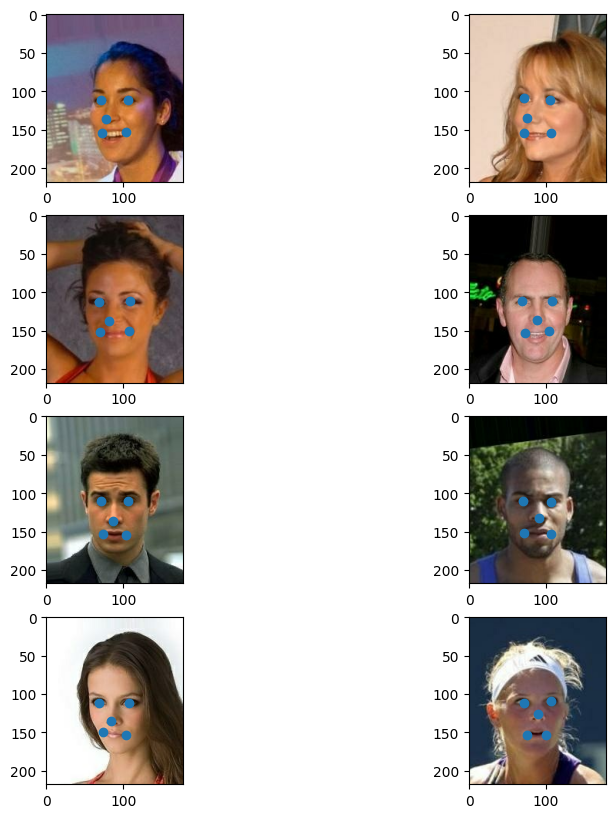

In [18]:
plot_imgs(img,labs)

Predicted Facial landmarks

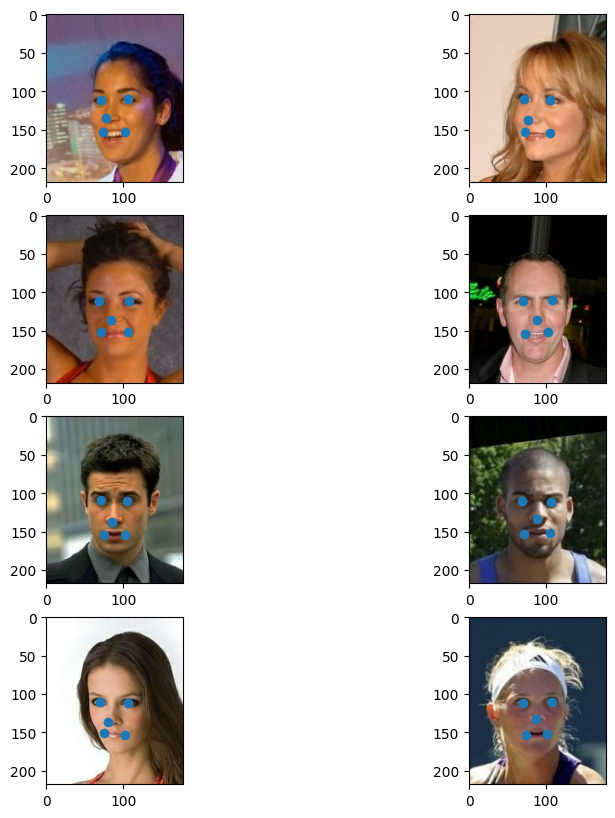

In [16]:
plot_imgs(img,pred_labs)

In [20]:
pred_labs

array([[ 70.444534, 110.60645 , 106.154434, 110.272   ,  77.88613 ,
        134.6844  ,  73.61293 , 153.38841 , 102.35069 , 152.38214 ],
       [ 71.12482 , 109.290306, 104.78588 , 110.98121 ,  76.88489 ,
        137.38516 ,  72.35637 , 153.38287 , 105.0971  , 154.50291 ],
       [ 68.4603  , 110.68406 , 107.73079 , 111.93233 ,  84.323906,
        136.34196 ,  71.01169 , 151.55373 , 106.28149 , 151.53218 ],
       [ 69.966286, 111.37507 , 107.18201 , 110.39287 ,  88.27854 ,
        136.14229 ,  72.99863 , 153.80342 , 102.51701 , 151.06512 ],
       [ 71.580086, 109.50575 , 104.629845, 110.363045,  84.72918 ,
        136.90775 ,  74.78421 , 154.19765 , 102.221306, 154.47588 ],
       [ 69.363205, 110.62878 , 106.9736  , 111.57327 ,  88.79517 ,
        134.16763 ,  71.85897 , 152.52188 , 105.6091  , 152.39648 ],
       [ 69.15814 , 110.27315 , 106.63026 , 111.605995,  80.04907 ,
        136.32968 ,  74.47152 , 151.26984 , 102.75511 , 153.06305 ],
       [ 69.73083 , 111.61185 , 107.36125

In [21]:
labs

<tf.Tensor: shape=(8, 10), dtype=float32, numpy=
array([[ 71., 111., 106., 111.,  78., 136.,  72., 154., 104., 153.],
       [ 71., 109., 105., 111.,  75., 135.,  72., 154., 106., 154.],
       [ 69., 112., 109., 111.,  81., 137.,  70., 152., 107., 151.],
       [ 69., 111., 108., 111.,  88., 136.,  73., 153., 104., 151.],
       [ 71., 110., 106., 110.,  87., 136.,  73., 153., 103., 154.],
       [ 70., 110., 107., 111.,  91., 132.,  71., 152., 107., 153.],
       [ 69., 111., 108., 112.,  84., 135.,  74., 150., 103., 153.],
       [ 71., 112., 107., 109.,  90., 126.,  75., 153., 100., 153.]],
      dtype=float32)>